# **WATER QUALITY EXPLANATORY DATA ANALYSIS**
---


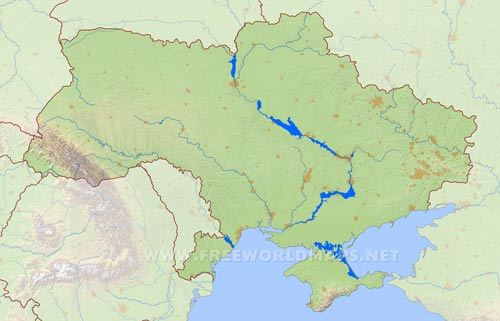

## **What to expect from this project?**

*   Data Wrangling and Preprocessing (Profiling, Cleaning, Reduction and Transformation)
*   Multivariate Exploratory Data Analysis
*   Geospatial (Regional) Analysis
*   Reccomendations for improving data collection



## **Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Drinking water and staying hydrated is associated with a reduced incidence of urinary tract infections (UTIs), lower blood pressure and heart disease. Therefore, drinking water is essential for good heart health.

Water is the most important nutrient for the body. It has many benefits for your health and helps to protect you from illness and disease. Water is also an essential part of a healthy lifestyle.

## **Table of Contents**

> 1.   **Preparation**
>>1.1   Python Libraries |
>>1.2   The Dataframe
> 2.   **Quality Check and Normalisation**
>>2.1   Missing Values |
>>2.2   Dataframe Reduction |
>>2.3   Columns Transformation |
>>2.4   Filling Data Gaps |
>>2.5   Considerations
> 3.   **Exploration**
>>3.1   Summary Statistics |
>>3.2   Data Distribution |
>>3.3   Correlation Analysis
> 4.   **Regional Analysis**
>>4.1   Reverse Geocoding |
>>4.2   Geospatial Autocorrelation |
>>4.2   Low-flow Conditions
> 5.   **Conclusion**
> 6.   **References**

# **1.0 Preparation**
---



### 1.1 Python Libraries

In [132]:
# Installing any packages not pre-existing in this platform.

#NOT USED YET
!pip install geopandas
!pip install contextily
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
# This notebook was created in a Google Colab notebook running Python with a handful of pre-installed libraries

import numpy as np # linear algebra
import pandas as pd # read csv file as a dataframe and wrangle the data
import missingno as msno # identify missing data
import matplotlib
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
import plotly.express as px # data visualisation
from geopy.geocoders import Nominatim # reverse geocoding
from tqdm.notebook import tqdm # Progress bar and API request details
import squarify # data visualitation (treemap)


# NOT USED YET
import geopy
from geopy.extra.rate_limiter import RateLimiter
import geopandas as gpd # to create spatial data
from shapely.geometry import Point, Polygon
import descartes
import contextily as cxt # for basemaps
import panel as pn
%matplotlib inline

### 1.2 The Dataframe

In [108]:
# Importing, reading a csv file as a Pandas DataFrame and initially assigning it to a variable called 'RawDataframe'

RawDataframe = pd.read_csv('/content/Hydrowaste.csv') 
RawDataframe # Print() is not required to generate outputs in Google Colab notebooks

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LATITUDE,LONGITUDE,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,2248,1,1279514,Strzyzow,Ukraine,UKR,50.841,24.031,2,50.840,...,1,Secondary,1,3.618801e+07,20352809,40.163,0,0,2500.0,2
1,56448,12,3598,NaN,Ukraine,UKR,44.396,33.977,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
2,56449,12,3599,NaN,Ukraine,UKR,44.410,34.021,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
3,56450,12,3600,NaN,Ukraine,UKR,44.440,33.724,1,44.494,...,4,Secondary,2,1.198600e+02,20514644,2.856,0,1,NaN,3
4,56452,12,3602,NaN,Ukraine,UKR,44.477,33.789,1,44.494,...,4,Secondary,2,1.019200e+02,20514644,2.856,0,1,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,56983,12,4133,NaN,Ukraine,UKR,51.464,23.973,1,51.452,...,4,Secondary,2,1.731160e+02,20336946,1.341,0,0,NaN,3
308,56987,12,4137,NaN,Ukraine,UKR,51.512,30.665,1,51.465,...,4,Secondary,2,1.627144e+04,20336870,554.698,0,1,NaN,3
309,56993,12,4143,NaN,Ukraine,UKR,51.569,32.944,1,51.594,...,4,Secondary,2,2.098007e+04,20334021,178.919,0,0,NaN,3
310,57030,12,4180,NaN,Ukraine,UKR,51.826,26.124,1,51.831,...,4,Secondary,2,3.791562e+03,20327161,53.894,0,0,NaN,3


COMMENT ON RESULTS:

>*   It looks like there's a lot in this dataset that I won't need and some key attributes that aren't contained here. Then I'll have a little work to normalise this before I start exploring it.







# **2.0 Quality Check and Normalisation**
---



### 2.1 Diagnosticing missing data

I'll start by scanning and mapping the relationships between the missing values to define a data cleaning strategy.

In [109]:
RawDataframe.info() # Checking data types and non-missing of missing values per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WASTE_ID    312 non-null    int64  
 1   SOURCE      312 non-null    int64  
 2   ORG_ID      312 non-null    int64  
 3   WWTP_NAME   1 non-null      object 
 4   COUNTRY     312 non-null    object 
 5   CNTRY_ISO   312 non-null    object 
 6   LATITUDE    312 non-null    float64
 7   LONGITUDE   312 non-null    float64
 8   QUAL_LOC    312 non-null    int64  
 9   LAT_OUT     312 non-null    float64
 10  LON_OUT     312 non-null    float64
 11  STATUS      312 non-null    object 
 12  POP_SERVED  312 non-null    int64  
 13  QUAL_POP    312 non-null    int64  
 14  WASTE_DIS   312 non-null    float64
 15  QUAL_WASTE  312 non-null    int64  
 16  LEVEL       312 non-null    object 
 17  QUAL_LEVEL  312 non-null    int64  
 18  DF          251 non-null    float64
 19  HYRIV_ID    312 non-null    i

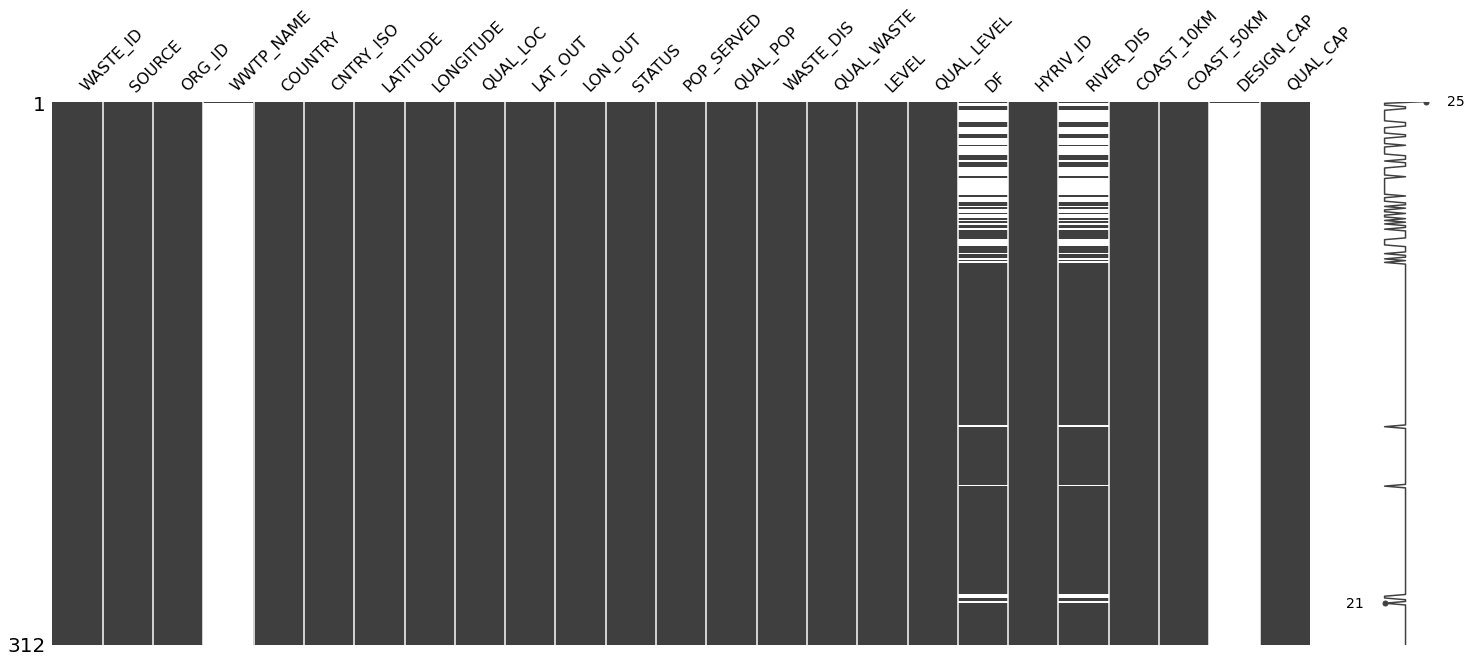

In [110]:
# MATRIX PLOT (Visualising the distribution of missing data)
# When data is present, the plot is shaded in grey, and when it is absent the plot is displayed in white.
msno.matrix(RawDataframe)

COMMENT OF RESULTS:
>*   There is no data in the WWTP_NAME and DESIGN_CAP columns. Therefore, they will have to be removed.
>*   A direct correlation between the missing values in the DF and RIVER_DIS columns can be easily seen in this image. This will require further assessment to decide whether I remove or fill in the gaps.



### 2.2 Dropping columns and rows

Here I decided to remove columns one by one instead of a direct selection of the columns to be used in my analysis because I want to keep records of the reasons for not using the each of them if I want to go back later.

In [111]:
# COLUMNS
Dataframe = RawDataframe.drop([
    'WWTP_NAME', 'DESIGN_CAP', # Columns missing over 95% of its data
    'SOURCE', 'COUNTRY', 'CNTRY_ISO', 'STATUS', 'LEVEL', # Columns containing 1 unique value
    'QUAL_LOC', 'QUAL_POP', 'QUAL_WASTE', 'QUAL_LEVEL', 'QUAL_CAP', # Quality check columns not relevant for this analysis
    'ORG_ID', 'HYRIV_ID' # Other non-relevant columns
                              ], axis=1)

# ROWS
# I noticed that the first row [0] countained records from the WWTP Strzyzow (WASTE ID 2248)
## which is actually located in east Poland, +70km away from the Poland-Ukraine border.
Dataframe.drop(0, inplace=True)

# I am referring here to the scientific study by Ehalt Macedo, et al. (2022) which assigns infinite values for dilution factors (DF)
## in WWTPs where the outfall location ranges within 10km and coincides with the ocean or a large lake over over 500km². And since there is no
###  meaningful value for these direct river discharges (RIVER_DIS), the related records would eventually be filtered out further down the analysis,
#### as they do not contain the necessary all attributes necessary and can create bias in calculations ahead.
Dataframe.dropna(inplace=True)

Dataframe.head(1)

,WASTE_ID,LATITUDE,LONGITUDE,LAT_OUT,LON_OUT,POP_SERVED,WASTE_DIS,DF,RIVER_DIS,COAST_10KM,COAST_50KM
3,56450,44.44,33.724,44.494,33.79,24948,2076.038,119.86,2.856,0,1


### 2.3 Grouping data into categories

The COAST_10KM and COAST_50KM columns follow a Boolean methodology to estimate the distance from WWTPs to their outfall areas. In this, values of 0 represent False and values of 1 represent True for claims that a particular WWTP is within the stated distance (see the image below for better understanding). It must be noted, though, that instead of just connecting WWTPs to the nearest river reach, the study introduced a tolerance of 6.5km on average to allocate the outfall location further downstream and connect WWTPs to a river with larger expected discharge.

Thereupon, to bring these concepts to a higher-level language, the logic values of the two columns will be combined to form a categorical group of distances in string format that is very easy to understand by all types of audiences. Remembering that the values for 'Close' may not be in the results because they were filtered out in the previous code.

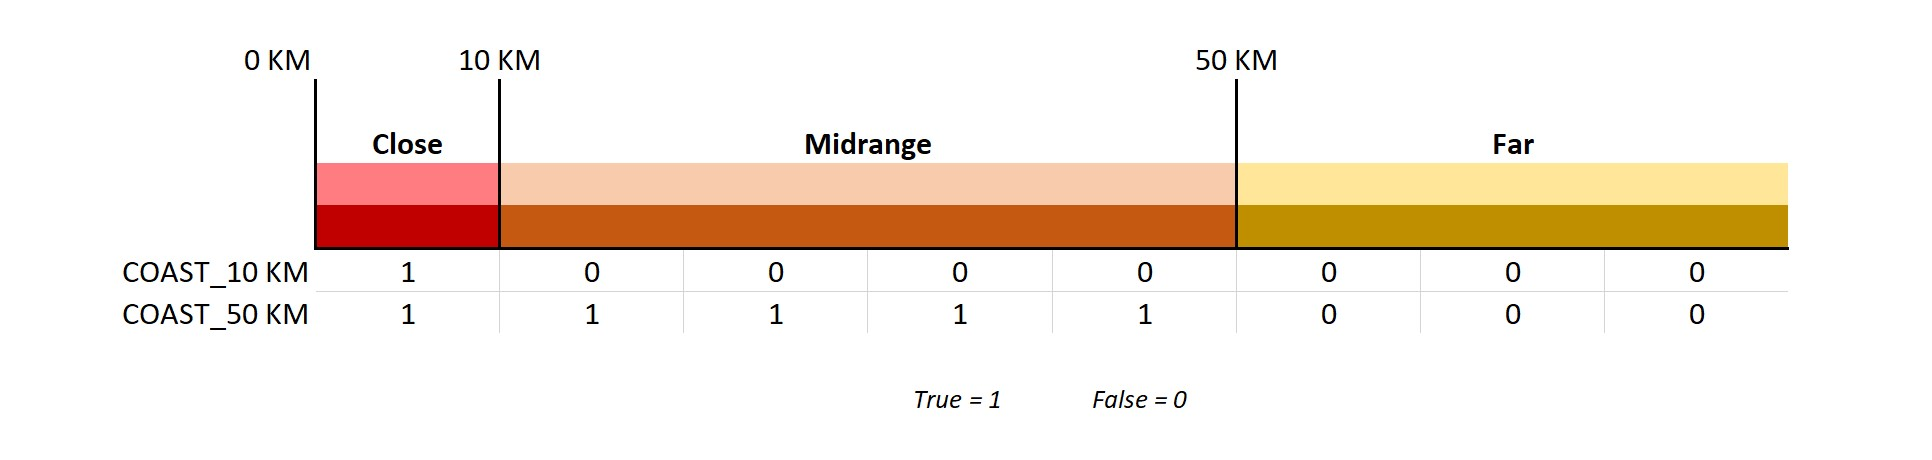

In [112]:
# Creating the conditions
conditions = [
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 0), # Far
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 1), # Midrange
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 1), # Close (if existent)
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 0), # Error (if existent)
             ]

# Creating the category names
values = ['Far', 'Midrange', 'Close', 'Error']

# Assembling them into a new column
Dataframe['OUTFALL_DISTANCE'] = np.select(conditions, values)

# Deleting these two columns because they are not necessary anymore.
Dataframe.drop(['COAST_10KM', 'COAST_50KM'], axis=1, inplace=True)

# Counting the elements' frequency to verify the presence of errors
np.unique(Dataframe['OUTFALL_DISTANCE'], return_counts=True) 

(array(['Far', 'Midrange'], dtype=object), array([195,  55]))

### 2.4 Reverse Geocoding

As these WWTPs do not display their names (only IDs) or the regions in which they are located in, I found it necessary to use an API to convert their coordinates and assign them to human-readable addresses (city and state) and facilitate the analysis.

In [119]:
# PART 1: EXTRACTION

# Generating a progress bar, number of iterations, time taken to run the loop, and frequency of iterations per second,
## so I can monitor the performance of this code.
tqdm.pandas()

#  Specifying the geocoding service
locator = Nominatim(user_agent='Google', timeout=10)

# Function reverse geocoding and extracting only city and state names
def city_state(row):
    coordinates = f"{row['LATITUDE']}, {row['LONGITUDE']}"
    location = locator.reverse(coordinates, language='en', exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    row['CITY'] = city
    row['STATE'] = state
    return row


Dataframe = Dataframe.progress_apply(city_state, axis=1)
Dataframe[['CITY', 'STATE']].head(3)

  0%|          | 0/250 [00:00<?, ?it/s]

,CITY,STATE
3,Орлиновский округ,Sevastopol
4,Орлиновский округ,Sevastopol
12,Верхореченское сельское поселение,Republic of Crimea


In [120]:
np.unique(Dataframe['STATE'], return_counts=True) 

(array(['', 'Autonomous Republic of Crimea', 'Cherkasy Oblast',
        'Chernihiv Oblast', 'Chernivtsi Oblast', 'Dnipropetrovsk Oblast',
        'Donetsk Oblast', 'Ivano-Frankivsk Oblast', 'Kharkiv Oblast',
        'Kherson Oblast', 'Khmelnytskyi Oblast', 'Kirovohrad Oblast',
        'Kyiv Oblast', 'Lublin Voivodeship', 'Luhansk Oblast',
        'Lviv Oblast', 'Mykolaiv Oblast', 'Odesa Oblast', 'Poltava Oblast',
        'Republic of Crimea', 'Rivne Oblast', 'Sevastopol', 'Sumy Oblast',
        'Ternopil Oblast', 'Vinnytsia Oblast', 'Volyn Oblast',
        'Zakarpattia Oblast', 'Zaporizhia Oblast', 'Zhytomyr Oblast'],
       dtype=object),
 array([ 4,  2, 11,  3,  2, 21, 34,  7, 17,  4,  5,  4, 21,  1, 21, 11,  8,
         3,  6,  9,  8,  2, 10, 11,  8,  4,  3,  4,  6]))

In [121]:
# As I already expected some data to fail to be extracted, I will have to create it manually
Dataframe[['CITY', 'STATE']].loc[(Dataframe['STATE'] == '')]

,CITY,STATE
265,Kyiv,
266,Kyiv,
268,Kyiv,
272,Kyiv,


In [122]:
# PART 2: CLEANING
# After a bit of research, I decided to name empty data as just 'Kyiv', which like Sevastopol, holds a status of both city and state
## (despite the existence of a Kyiv Oblast that surrounds the capital city)
Dataframe.loc[(Dataframe['STATE'] == ''),['STATE']] = 'Kyiv'

# Also, there are duplicate classifications for the Crimea region, so I'll use it for the current official name.
Dataframe.loc[(Dataframe['STATE'] == 'Republic of Crimea'),['STATE']] = 'Autonomous Republic of Crimea'

# And I identified that one of the WWTP with a state named 'Lublin Voivodeship', which is located on
## the border between Poland and Volyn Oblast (UKR), despite the WWTP being classified as Ukrainian.
Dataframe.loc[(Dataframe['STATE'] == 'Lublin Voivodeship'),['STATE']] = 'Volyn Oblast'

# Dropping the city column after all that
Dataframe = Dataframe.drop(['CITY'], axis=1)

COMMENT OF RESULTS:
>*   I ended up choosing to keep only the states of each WWTP for data aggregation, as all the geocoding services I used (Google, OpenStreetMap,...) failed to get most of the city names and the ones succeeded were in the Ukrainian language , thus making this column irrelevant.



### Creating a Geometry Column

In [84]:
# Zipping Latitude (x) and Longitude (y) coordinates into a single feature
geometry = [Point(xy) for xy in zip(Dataframe['LATITUDE_WWTP'], Dataframe['LONGITUDE_WWTP'])]
geometry[:3]

# Creating GeoPandas dataframe and designating a coordinate system
GeoDataframe = gpd.GeoDataFrame(Dataframe,
                                crs = {'init': 'epsg:4326'},
                                geometry = geometry)
GeoDataframe.head(1)

KeyError: ignored

### 2.5 Renaming columns

I decided to rename the columns to facilitate a better reading and understanding of the codes written from this section now on.

In [123]:
Dataframe.rename(columns={
    'WASTE_ID': 'WWTP_ID', # ID of each wastewater treatment plant (WWTP).
    'POP_SERVED': 'POPULATION_SERVED', # Size of the population served by the WWTP.
    'DF': 'DILUTION_FACTOR', # Estimated dilution factor.
    'WASTE_DIS' : 'WASTEWATER_DISCHARGED', # Treated wastewater discharged by the WWTP in m3.
    'RIVER_DIS' : 'RIVER_DISCHARGED', # Estimated the volume of water flowing through a river channel at the WWTP outfall location in m3.
    'LATITUDE': 'LATITUDE_WWTP', # Latitude of reported WWTP location.
    'LONGITUDE': 'LONGITUDE_WWTP', # Longitude of reported WWTP location.
    'LAT_OUT': 'LATITUDE_OUTFALL', # Latitude of the estimated outfall location.
    'LON_OUT': 'LONGITUDE_OUTFALL' # Longitude of the estimated outfall location.
                         }, inplace=True)

Dataframe.head(1)

,WWTP_ID,LATITUDE_WWTP,LONGITUDE_WWTP,LATITUDE_OUTFALL,LONGITUDE_OUTFALL,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,OUTFALL_DISTANCE,STATE
3,56450,44.44,33.724,44.494,33.79,24948,2076.038,119.86,2.856,Midrange,Sevastopol


### 2.6 [!!!] Considerations

1.   The majority of the values recorded in the ***rawdf*** dataframe 
1 = Reported as ‘treated’ by national/regional dataset; 2 = Reported as ‘design capacity’ by national/regional dataset; 3 = Reported but type not identified; 4 = Estimated

2.   The lack of accurate categorical data on the **STATUS** **of activities of WWTPs** could increase the risk of biased analysis results, since there is no way to effectively determine which ones are *operational*, *under construction*, *temporarily deactivated*, or *decommissioned*, and thus leaving only the assumption of operability to all of them. These WWTPs might have been included in this dataset for their potential as a source of residues in river sediments from former discharges.

3.   There is no data on the **names of the WWTPs** and their **projected capacities**, which makes it more difficult to make adequate identifications as well as bivariate correlations with the size of their served populations.

4. Due to the lack of reports on actual amounts of treated-wastewater discharge (WASTEWATER_DISCHARGED) for each WWTP, this attribute is an estimate directly related to the size of its population served.

5.   The dataframe includes reports on WWTPs located in Crimea (LATITUDE_WWTP below 46 and LONGITUDE_WWTP above 32). Thereupon, periodic reviews must consider current geopolitical scenarios in deciding whether to keep them in the dataframe, as data on such WWTPs have increased risk of being biased.

Factors you think are required to more accurately measure water portability

# **3.0 Exploration**
---




### 3.1 Summary Statistics

In [104]:
# Assigning a variable containing only statistical columns for further analyses.
StatsDataframe = Dataframe[['POPULATION_SERVED', 'WASTEWATER_DISCHARGED', 'DILUTION_FACTOR', 'RIVER_DISCHARGED', 'OUTFALL_DISTANCE', 'STATE']]

# Retrieving a complete statistics summary for integers, floats and strings. 
StatsDataframe.describe(include='all')

,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,OUTFALL_DISTANCE,STATE
count,250.000000,250.000000,250.000000,250.000000,250,250
unique,NaN,NaN,NaN,NaN,2,27
top,NaN,NaN,NaN,NaN,Far,Donetsk Oblast
freq,NaN,NaN,NaN,NaN,195,34
mean,58370.412000,4857.327516,18253.682240,170.109708,NaN,NaN
std,97081.313598,8078.682259,86111.246797,698.366831,NaN,NaN
min,86.000000,7.143000,2.344000,0.072000,NaN,NaN
25%,9311.000000,774.784750,45.303500,0.972500,NaN,NaN
50%,23629.000000,1966.275500,182.320500,3.709000,NaN,NaN
75%,62272.750000,5182.039000,993.983500,29.915500,NaN,NaN


COMMENT ON RESULTS:

>*   27 Ukrainian states like the official number, CHECK. 2 categories for Outfall Distance after applying a filter, also CHECK.
>*   Dilution factor numbers vary widely from minimum to maximum, with the bottom 25% falling into high contamination danger zones.
>*   There is a huge discrepancy between the values in m3 of discharge of treated sewage and river flows, indicating that in general, Ukrainian rivers may not be able to effectively dilute effluents from treatment plants.








### 3.2 Data Distribution

In [195]:
TreemapDf = Dataframe.groupby(['STATE'])['POPULATION_SERVED'].sum().round().reset_index()

TreemapDf = TreemapDf.sort_values(['POPULATION_SERVED'], ascending=False)

TreemapDf

,STATE,POPULATION_SERVED
5,Donetsk Oblast,1860389
4,Dnipropetrovsk Oblast,1662091
11,Kyiv,1617169
7,Kharkiv Oblast,1498284
13,Luhansk Oblast,989573
14,Lviv Oblast,893898
12,Kyiv Oblast,696685
0,Autonomous Republic of Crimea,583196
6,Ivano-Frankivsk Oblast,541702
18,Rivne Oblast,460350


In [196]:
fig = px.treemap(TreemapDf, 
                 path=['STATE'], 
                 values='POPULATION_SERVED',
                 color='POPULATION_SERVED',
                 color_continuous_scale='GnBu'
                )
fig.show()

ValueError: ignored

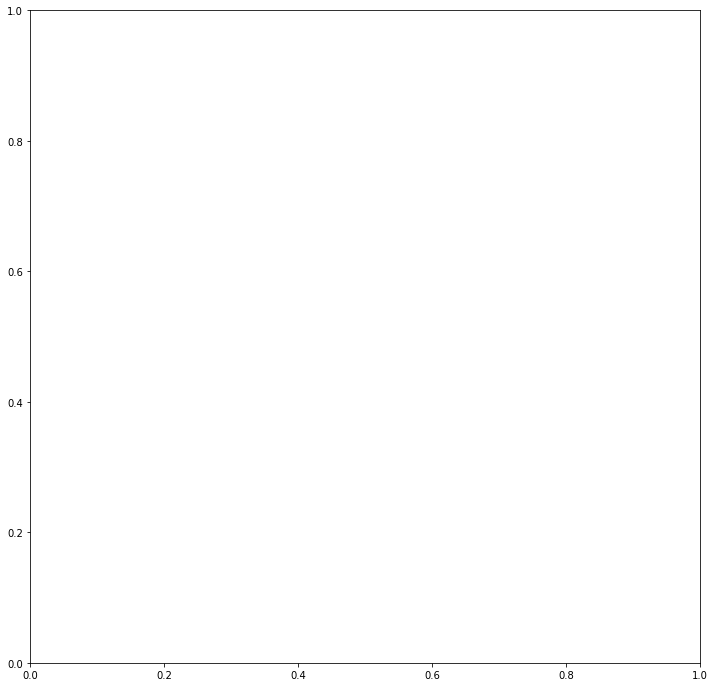

In [179]:
fig, ax = plt.subplots(1, figsize = (12,12))

squarify.plot(sizes=TreemapDf['POPULATION_SERVED'], 
              label=TreemapDf['POPULATION_SERVED'], 
              alpha=.8 )
plt.axis('off')
plt.show()



In [105]:
# [YES]

px.histogram(StatsDataframe, x= 'POPULATION_SERVED', color= 'STATE')

In [20]:
px.histogram(StatsDataframe, x= 'WASTEWATER_DISCHARGED', color= 'OUTFALL_DISTANCE')

In [21]:
px.histogram(StatsDataframe, x= 'DILUTION_FACTOR', color= 'OUTFALL_DISTANCE')

In [22]:
px.histogram(StatsDataframe, x= 'RIVER_DISCHARGED', color= 'OUTFALL_DISTANCE')

### 3.3 Correlation Analysis

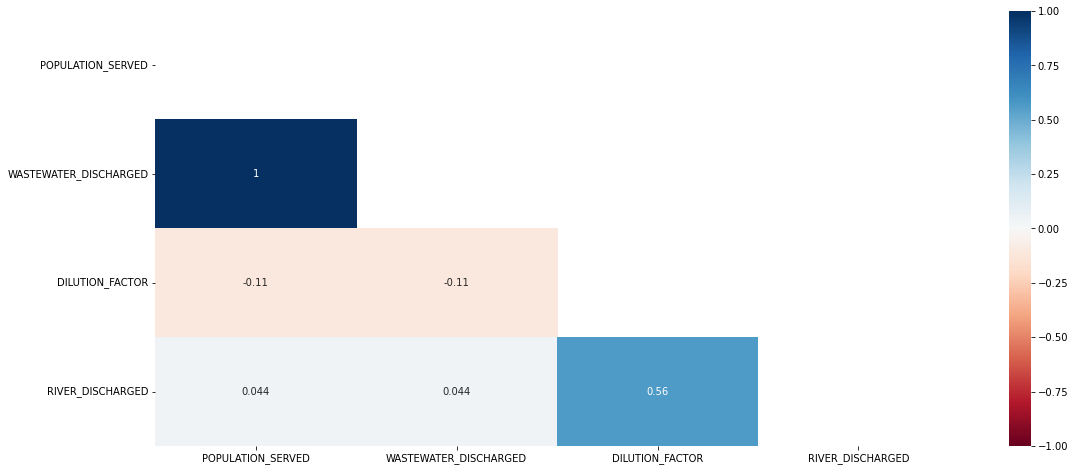

In [131]:
# Setting the size and ration of the visual
plt.figure(figsize= (18, 8))

# Generating a mask for the upper triangle
mask= np.triu(np.ones_like(StatsDataframe.corr(), dtype= bool))

# Setting the visual with a range of values to be displayed on the colormap from -1 to 1,
## and set the annotation to True to display the correlation values on the heatmap.
heatmap= sns.heatmap(StatsDataframe.corr(), mask= mask, vmin= -1, vmax= 1, annot= True, cmap= 'RdBu')

COMMENT OF RESULTS:
>*   Levels of treated-wastewater discharge are in perfect correlation with sizes of population served by each WWTP. However, that is explained by this attribute being a population-based estimation made by Ehalt Macedo, et al. (2022, see section 2.1.4) to fill missing data and ensure consistency throughout the dataframe.
>*   


### 3.3 Answering Queries


**3.3.1**   What are the largest concentrations of population served by a single WWTP?



In [141]:
Dataframe[['STATE', 'WWTP_ID', 'POPULATION_SERVED', 'DILUTION_FACTOR']].sort_values(
            by=['POPULATION_SERVED'], 
            inplace=False,
            ascending=False
                     ).head(5)

,STATE,WWTP_ID,POPULATION_SERVED,DILUTION_FACTOR
268,,56878,719465,2204.364
235,Kharkiv Oblast,56833,712076,15.938
272,,56884,669234,14.915
139,Dnipropetrovsk Oblast,56725,406941,4534.639
152,Luhansk Oblast,56738,342228,48.929


**3.3.2**   What is the average dilution factor of each outfall distance group?

In [ ]:
Dataframe.groupby(['STATE'])['POPULATION_SERVED'].mean().round()

In [154]:
Dataframe.groupby(['OUTFALL_DISTANCE'])['POPULATION_SERVED', 'WASTEWATER_DISCHARGED',
                                        'RIVER_DISCHARGED' , 'DILUTION_FACTOR'
                                       ].mean().round()

<ipython-input-154-1cd8db48498a>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,POPULATION_SERVED,WASTEWATER_DISCHARGED,RIVER_DISCHARGED,DILUTION_FACTOR
OUTFALL_DISTANCE,,,,
Far,52963.0,4407.0,48.0,2718.0
Midrange,77543.0,6453.0,603.0,73336.0


COMMENT ON RESULTS:
>*   WWTPs located less than 50 km from their outfalls benefit from an average river discharge 12 times greater than those located further away. This clearly impacts on the dilution levels of treated-wastewater discharge, which are washed away to water bodies more quickly.







In [ ]:
Dataframe

# **4.0 Regional Analysis**
---




### 4.1 Reverse Geocoding

In [ ]:
#@title Shapefiles

Shapefile = gpd.read_file('/content/Shapefiles/gg870xt4706.shp')
Shapefile.head(2)

In [ ]:
Dataframe['GEOCODE_WWTP'] = Dataframe['LATITUDE_WWTP'].map(str) + ',' + Dataframe['LONGITUDE_WWTP'].map(str)



# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
 
 
# Latitude & Longitude input
location = geolocator.reverse(GeoDataframe['geometry'])
 
address = location.raw['address']
 
# traverse the data
Dataframe['WWTP_CITY'] = address.get('city', '')
Dataframe['WWTP_STATE'] = address.get('state', '')

Dataframe.head(3)

In [ ]:
locator = Nominatim(user_agent='Google', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)


tqdm.pandas()

Dataframe['ADDRESS_WWTP'] = Dataframe['GEOCODE_WWTP'].progress_apply(rgeocode)
Dataframe.head(2)

### 4.2 Spatial Autocorrelation

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
Shapefile.plot(ax = ax, alpha=0.4, color='grey')
GeoDataframe[GeoDataframe['OUTFALL_DISTANCE'] == 'Close'].plot(ax = ax, markersize = 5, color='red', marker='>', label = 'Close')
GeoDataframe[GeoDataframe['OUTFALL_DISTANCE'] == 'Midrange'].plot(ax = ax, markersize = 5, color='orange', marker='*', label = 'Midrange')
GeoDataframe[GeoDataframe['OUTFALL_DISTANCE'] == 'Far'].plot(ax = ax, markersize = 5, color='yellow', marker='^', label = 'Far')
plt.legend(prop={'size':5})

### 4.2 Low-flow Conditions

### 4.? Prioritising regions


According to [Ehalt Macedo, et al. (2020, section 2.1.4)](https://essd.copernicus.org/articles/14/559/2022/#section4), the minimum dilution factor recommended for environmental risk assessments of medicinal products for human use is 10. However, in reality lots of streams receive wastewater higher than they can carry away, representing, thus, often a DF equal or lower than 3.

That being said, 

```
High Dilution Factor = 

Priority Score = Dilution Factor ÷ Population Served
```




# **5.0 Conclusion**
---




1.   Idea 1
2.   Idea 2

# **6.0 References**
---




*   Ehalt Macedo, H., Lehner, B., Nicell, J., Grill, G., Li, J., Limtong, A., and Shakya, R.: Distribution and characteristics of wastewater treatment plants within the global river network, Earth Syst. Sci. Data, 14, 559–577, https://doi.org/10.5194/essd-14-559-2022, 2022.

# **NOTES**
---



### **Cool Usable Codes**



*   ***Seaborn Pair Plot with Hue*** (Multivariate Analysis; Multi plot charts)
        sns.pairplot (data = dataframe, hue = 'column1')
*   ***NumPy Filling Null Values*** (Replace missing data in the dataframe)
        df = df.fillna(0) # Or whatever the string or data type you want
        df['gdp_per_capita'] = np.where(df['column1']!=, df['gdp'] / df['population'], 0] # creating a new column by dividing gdp per population
*   List item
        Insert code


### Links To Go Back Later

*   [Distribution and characteristics of wastewater treatment plants within the global river network](https://essd.copernicus.org/articles/14/559/2022/)
*   [Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)
*   [Python Jupyter - Insight to Univariate and Multivariate Distribution Plots](https://www.youtube.com/watch?v=vssXHSLSGL4&ab_channel=NomanArshed)
*   [Univariate, Bivariate, and Multivariate Data Analysis in Python](https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173#:~:text=Multivariate%20analysis%20is%20a%20more,plot%2C%20with%20Hue%20as%20Approved.)
*   List item






In [73]:
Dataframe.to_csv('Dataframe.csv')

In [88]:
px.scatter_mapbox(Dataframe, lat='LATITUDE', lon='LONGITUDE')